In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

In [2]:
df = pd.read_csv('datasets/BeerDataScienceProject.tar.bz2', compression="bz2")

In [3]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [4]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [5]:
df['beer_ABV'].isnull().sum()

20280

In [6]:
df["review_text"].isnull().sum()

119

In [7]:
df.dropna(subset = 'review_text',axis =0,inplace = True)

In [8]:
df.groupby(by = 'beer_brewerId').mean().sort_values(by = 'beer_ABV',ascending = False)[:3]

,beer_ABV,beer_beerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
beer_brewerId,,,,,,,,
6513,19.228824,34235.676471,3.558824,3.529412,3.411765,3.470588,3.514706,1.219645e+09
736,13.750000,4341.631579,3.947368,4.342105,3.815789,4.131579,4.236842,1.059959e+09
24215,12.466667,69983.000000,3.833333,4.000000,3.833333,3.833333,3.833333,1.313067e+09


## As we can see in the above table the top three breweries to produce strongest beers are 6513, 736, 24215

In [9]:
df['review_time'].dtype

dtype('int64')

In [10]:
from datetime import datetime

In [11]:
df['review_time'] = df['review_time'].apply(lambda x: datetime.fromtimestamp(x))

In [12]:
df['review_time']

0        2009-02-17 02:27:03
1        2009-03-01 19:14:57
2        2009-03-01 19:40:04
3        2009-02-16 00:42:25
4        2010-12-31 00:23:26
                 ...        
528865   2008-03-11 10:48:41
528866   2008-02-20 12:29:43
528867   2008-01-26 09:44:57
528868   2008-01-25 04:24:50
528869   2008-01-15 00:16:07
Name: review_time, Length: 528751, dtype: datetime64[ns]

In [13]:
df['review_year'] = df['review_time'].apply(lambda x: x.year)

In [14]:
df['review_year']

0         2009
1         2009
2         2009
3         2009
4         2010
          ... 
528865    2008
528866    2008
528867    2008
528868    2008
528869    2008
Name: review_year, Length: 528751, dtype: int64

In [15]:
df.groupby(by = 'review_year').mean().sort_values(by='review_overall').iloc[-1]

beer_ABV                5.895000
beer_beerId           674.303030
beer_brewerId        1122.272727
review_appearance       3.909091
review_palette          3.939394
review_overall          4.181818
review_taste            3.984848
review_aroma            4.196970
Name: 2000, dtype: float64

## The above record displays the highest average rating in any year. It is 4.181818 in the year 2000

Text(0.5, 1.0, 'Appearence box plot')

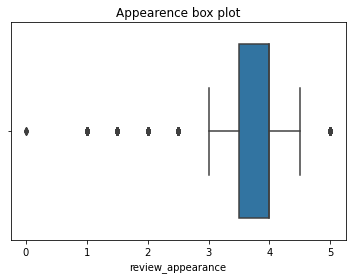

In [16]:
sns.boxplot(data = df,x = 'review_appearance')
plt.title('Appearence box plot')

Text(0.5, 1.0, 'Palette box plot')

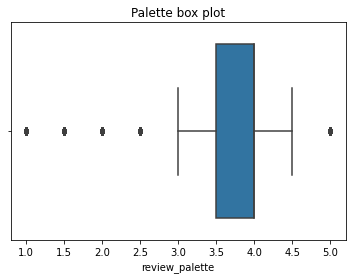

In [17]:
sns.boxplot(data = df,x = 'review_palette')
plt.title('Palette box plot')

Text(0.5, 1.0, 'Taste box plot')

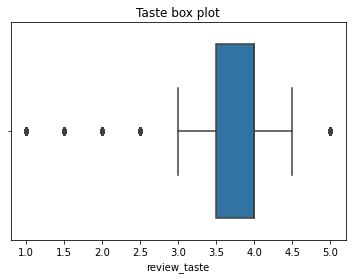

In [18]:
sns.boxplot(data = df,x = 'review_taste')
plt.title('Taste box plot')

Text(0.5, 1.0, 'Aroma box plot')

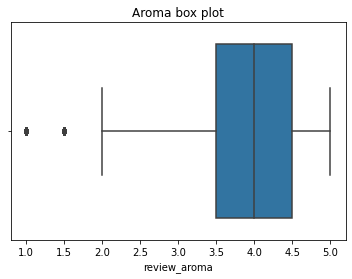

In [19]:
sns.boxplot(data = df,x = 'review_aroma')
plt.title('Aroma box plot')

Text(0.5, 1.0, 'Overall rating box plot')

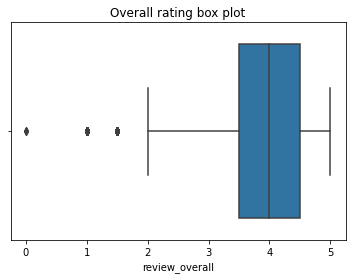

In [20]:
sns.boxplot(data = df,x = 'review_overall')
plt.title('Overall rating box plot')

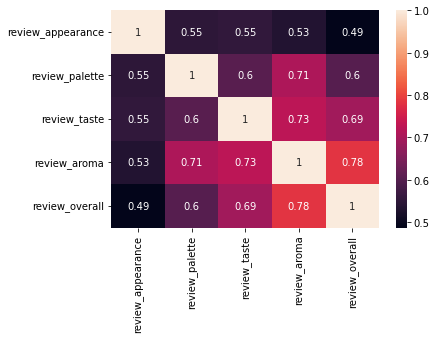

In [21]:
from seaborn import heatmap
_ = heatmap(data=df[['review_appearance','review_palette','review_taste','review_aroma','review_overall']].corr(), annot=True)

## We can see the most highest correlation with overall rating is for aroma rating. So we see that aroma is the most important factor in rating as it has the highest similarity rating to overall rating. The importance of other factors can also be ranked on the basis of correlation.

In [22]:
df[df['beer_name']=='Sierra Nevada Celebration Ale']

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
83297,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.0,4.0,4.0,4.0,Jayli,4.5,Consumed 12/1 A: This beer pours a nice clear ...,2009-12-13 03:21:17,2009
83298,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.0,4.0,4.0,4.5,moosiz,4.0,Poured into a Frankenmuth brewery pint glass t...,2009-12-12 10:42:43,2009
83299,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,4.0,4.5,4.0,pmccallum86,4.5,Pours a hazy red color with a huge thick head ...,2009-12-12 08:01:03,2009
83300,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,5.0,4.0,4.0,4.5,Ottertude,4.0,Hooray for the Xmas season because that means ...,2009-12-12 05:57:47,2009
83301,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.0,4.5,4.5,4.5,thecarster1,4.5,"a- bottle poured into a pint, half finger head...",2009-12-12 01:42:45,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86292,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,4.5,5.0,4.5,mjtiernan,4.5,12oz bottle poured into a NB globe A: Rich cop...,2011-12-13 10:50:52,2011
86293,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,4.0,4.5,5.0,jsdunlop,4.0,"2011 Light amber, massive carbonation visible,...",2011-12-13 08:54:43,2011
86294,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,4.0,4.0,4.0,MaxSpang,4.5,Served in a tulip. APPEARANCE Celebration is a...,2011-12-13 06:30:36,2011
86295,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,4.0,4.0,4.5,BUNZILLA,4.5,12oz bottle poured into a large sniffter Appea...,2011-12-13 05:47:50,2011


In [23]:
df['beer_beerId'].value_counts()

1904     2999
276      2586
11757    2502
2671     2492
34       2480
         ... 
73328       1
73785       1
70614       1
58898       1
47986       1
Name: beer_beerId, Length: 20200, dtype: int64

In [24]:
ratings_df = df[['beer_beerId','beer_name','review_overall']].groupby(by = 'beer_beerId').mean()

In [25]:
ratings_df

,review_overall
beer_beerId,
3,4.166667
4,3.700000
5,3.549528
6,3.706956
7,3.266313
...,...
77302,3.500000
77303,5.000000
77305,4.000000


In [26]:
count_df = df[['beer_beerId','review_overall']].groupby(by = 'beer_beerId').count()

In [27]:
count_df.rename(columns = {'review_overall':'review_count'}, inplace = True)

In [28]:
count_df

,review_count
beer_beerId,
3,3
4,10
5,424
6,877
7,659
...,...
77302,1
77303,1
77305,1


In [29]:
grouped_df = ratings_df.join(count_df)

In [30]:
grouped_df

,review_overall,review_count
beer_beerId,,
3,4.166667,3
4,3.700000,10
5,3.549528,424
6,3.706956,877
7,3.266313,659
...,...,...
77302,3.500000,1
77303,5.000000,1
77305,4.000000,1


In [31]:
grouped_df['all_ratings'] = grouped_df['review_overall'] * grouped_df['review_count']

In [32]:
arith_avg = grouped_df['all_ratings'].sum()/grouped_df['review_count'].sum()

In [33]:
arith_avg

3.833146414853116

In [34]:
grouped_df.sort_values(by = 'review_count',inplace = True)

In [35]:
grouped_df

,review_overall,review_count,all_ratings
beer_beerId,,,
40712,4.500000,1,4.5
43636,2.000000,1,2.0
43638,3.000000,1,3.0
43688,4.000000,1,4.0
43695,3.500000,1,3.5
...,...,...,...
34,4.297581,2480,10658.0
2671,3.966091,2492,9883.5
11757,4.354516,2502,10895.0


In [36]:
confidence_num = grouped_df.review_count.quantile(.25)

In [37]:
# grouped_df[grouped_df['review_count'] != 1]

In [38]:
grouped_df['bayesian_rating'] = (grouped_df['review_count']*grouped_df['review_overall'] + arith_avg*confidence_num) / (grouped_df['review_count']+confidence_num)

In [39]:
grouped_df['bayesian_rating']

beer_beerId
40712    4.166573
43636    2.916573
43638    3.416573
43688    3.916573
43695    3.666573
           ...   
34       4.297393
2671     3.966038
11757    4.354308
276      4.245780
1904     4.168444
Name: bayesian_rating, Length: 20200, dtype: float64

In [40]:
grouped_df.sort_values(by= 'bayesian_rating',ascending = False)

,review_overall,review_count,all_ratings,bayesian_rating
beer_beerId,,,,
70054,4.937500,8,39.5,4.814794
67111,4.928571,7,34.5,4.791643
37070,4.916667,6,29.5,4.761878
8626,4.768293,41,195.5,4.746027
59949,4.857143,7,34.0,4.729143
...,...,...,...,...
51067,1.612245,49,79.0,1.656663
4683,1.472222,18,26.5,1.596481
55523,1.214286,7,8.5,1.541643


In [41]:
df[df['beer_beerId'].isin([70054,67111,37070])]['beer_name'].unique()

array(['Pilot Series Passionfruit And Dragonfruit Berliner Weiss',
       'Alesmith Speedway Stout -\xa0Vanilla And Coconut\xa0',
       'Iceberg Strong Pale Ale'], dtype=object)

## Since the number of ratings for each beer vary I am using bayesian average for ranking of beer instead of the review_overall

## According to bayesian average the top 3 recommended beers are 
1. Pilot Series Passionfruit And Dragonfruit Berliner Weiss
2. Alesmith Speedway Stout - Vanilla And Coconut
3. Iceberg Strong Pale Ale

In [42]:
df['review_text'][0]

'A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.'

In [43]:
df.iloc[0]

beer_ABV                                                            5.0
beer_beerId                                                       47986
beer_brewerId                                                     10325
beer_name                                                  Sausa Weizen
beer_style                                                   Hefeweizen
review_appearance                                                   2.5
review_palette                                                      2.0
review_overall                                                      1.5
review_taste                                                        1.5
review_profileName                                              stcules
review_aroma                                                        1.5
review_text           A lot of foam. But a lot. In the smell some ba...
review_time                                         2009-02-17 02:27:03
review_year                                                     

In [44]:
from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [45]:
download("vader_lexicon", quiet=True)

True

In [46]:
analyser = SentimentIntensityAnalyzer()

In [47]:
df["review_sentiment"] = df["review_text"].apply(lambda x: analyser.polarity_scores(text=x)["compound"])

In [48]:
df.groupby(by="beer_style")["review_sentiment"].agg(func=["mean", "count"]).sort_values(by="mean", ascending=False)

,mean,count
beer_style,,
Quadrupel (Quad),0.857887,4933
Dortmunder / Export Lager,0.852428,1809
Braggot,0.850789,199
Flanders Red Ale,0.849444,2856
American Double / Imperial Stout,0.847810,23352
...,...,...
Happoshu,0.533456,55
American Malt Liquor,0.524399,1410
Japanese Rice Lager,0.519356,496


## As we can see from the above table that Quadupel (Quad) is the most favourite type of beer.

In [49]:
df_quad = df[df["beer_style"] == "Quadrupel (Quad)"]
df_quad[["review_sentiment", "review_overall"]].corr()

,review_sentiment,review_overall
review_sentiment,1.000000,0.258745
review_overall,0.258745,1.000000


## We can see there is a low correlation between the review sentiment and the overall review. It was expected as the reviews are gievn by humans but the sentiment analyser is not analysing at human level.